In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\DSC\Desktop\stock prices.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
df.dtypes

symbol            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [6]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.drop('date', axis=1, inplace=True)

In [7]:
df.head()

,symbol,open,high,low,close,volume,year,month,day
0,AAL,25.0700,25.8200,25.0600,25.3600,8998943,2014,1,2
1,AAPL,79.3828,79.5756,78.8601,79.0185,58791957,2014,1,2
2,AAP,110.3600,111.8800,109.2900,109.7400,542711,2014,1,2
3,ABBV,52.1200,52.3300,51.5200,51.9800,4569061,2014,1,2
4,ABC,70.1100,70.2300,69.4800,69.8900,1148391,2014,1,2


In [8]:
df['symbol'].value_counts()

AAL     1007
PRGO    1007
NVDA    1007
NUE     1007
NTRS    1007
        ... 
DXC      189
BHGE     126
BHF      117
DWDP      83
APTV      18
Name: symbol, Length: 505, dtype: int64

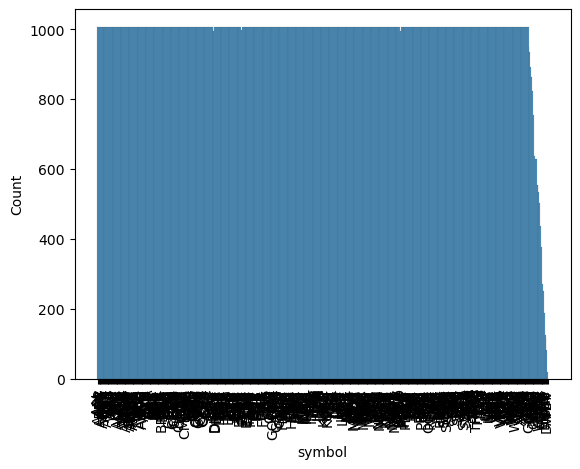

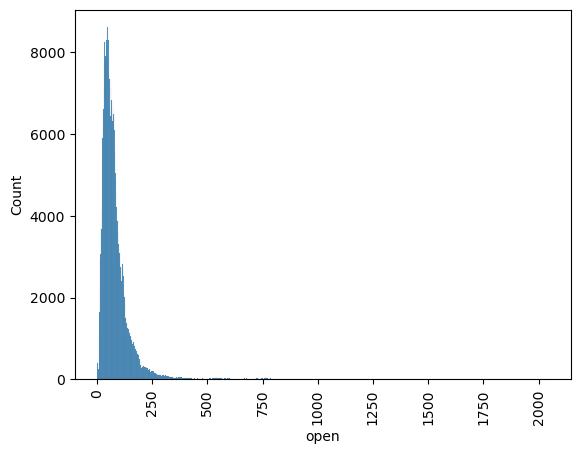

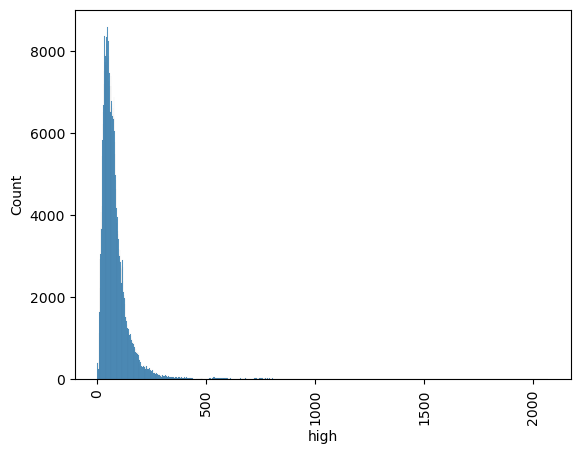

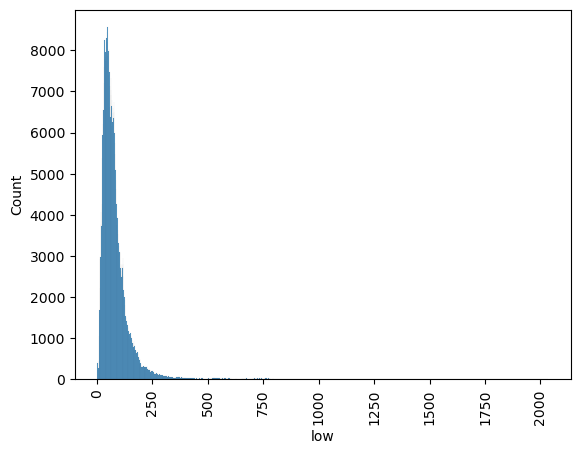

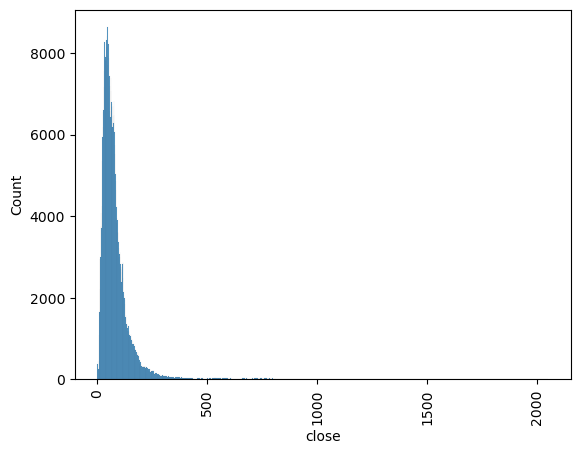

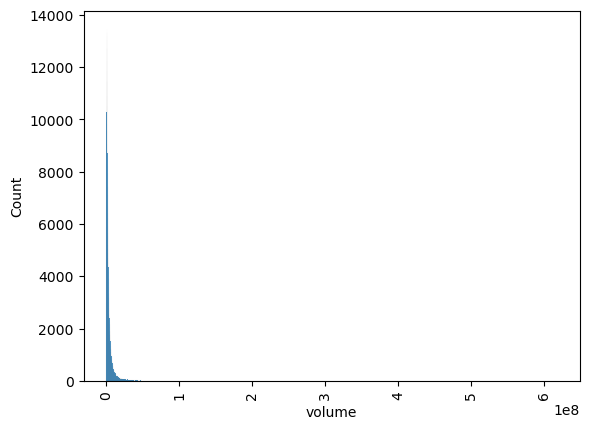

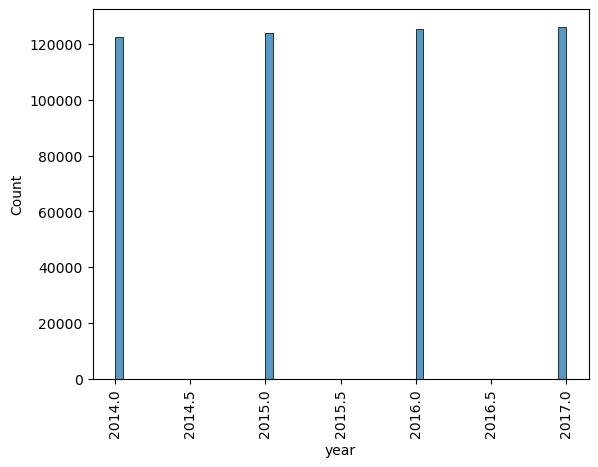

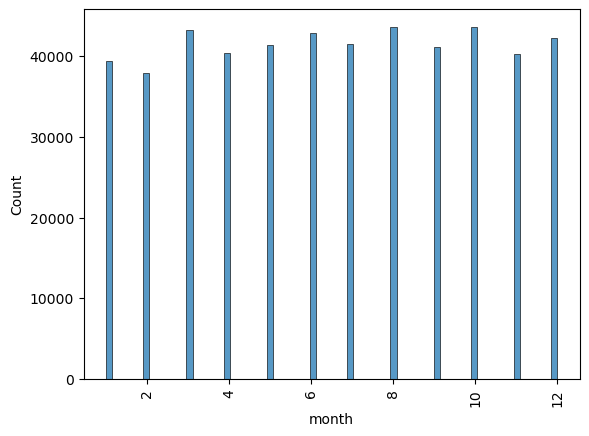

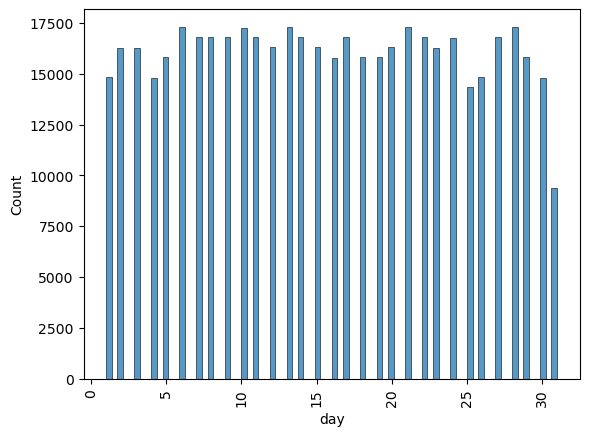

In [9]:
for column in df.columns:
    histograph = sns.histplot(x=df[column], data=df)
    plt.xticks(rotation=90)
    plt.show()

In [10]:
# Remove Outliers for OPEN feature
df_filtered = df[df['open'] <= 250]
df_filtered = df[df['high'] <= 250]
df_filtered = df[df['low'] <= 250]
df_filtered = df[df['close'] <= 250]
df_filtered = df[df['volume'] <= 2400000]

df_filtered.shape

(275931, 9)

In [11]:
le = LabelEncoder()

df_filtered['symbol']= le.fit_transform(df_filtered['symbol'])

C:\Users\DSC\AppData\Local\Temp\ipykernel_13696\362996810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['symbol']= le.fit_transform(df_filtered['symbol'])


In [12]:
df_filtered.head()

,symbol,open,high,low,close,volume,year,month,day
2,2,110.36,111.88,109.29,109.74,542711,2014,1,2
4,4,70.11,70.23,69.48,69.89,1148391,2014,1,2
10,10,80.17,80.45,79.38,79.86,1965869,2014,1,2
12,11,262.44,262.68,258.78,262.34,547808,2014,1,2
13,13,36.05,36.11,35.47,35.53,1394264,2014,1,2


In [13]:
for column in df.columns:
    df_filtered[column].fillna(df_filtered[column].mean(), inplace=True)

df_filtered.isnull().sum().sum()

C:\Users\DSC\AppData\Local\Temp\ipykernel_13696\3238629665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column].fillna(df_filtered[column].mean(), inplace=True)


0

In [14]:
Y = df_filtered['volume']
X = df_filtered.drop('volume', axis=1)

print(X, Y)
print(X.shape, Y.shape)

        symbol    open    high     low   close  year  month  day
2            2  110.36  111.88  109.29  109.74  2014      1    2
4            4   70.11   70.23   69.48   69.89  2014      1    2
10          10   80.17   80.45   79.38   79.86  2014      1    2
12          11  262.44  262.68  258.78  262.34  2014      1    2
13          13   36.05   36.11   35.47   35.53  2014      1    2
...        ...     ...     ...     ...     ...   ...    ...  ...
497467     466   68.53   68.80   67.92   68.20  2017     12   29
497468     467   82.64   82.71   81.59   81.61  2017     12   29
497469     468  121.75  121.95  120.62  120.67  2017     12   29
497470     469   51.28   51.55   50.81   50.83  2017     12   29
497471     470   72.55   72.76   72.04   72.04  2017     12   29

[275931 rows x 8 columns] 2          542711
4         1148391
10        1965869
12         547808
13        1394264
           ...   
497467    1046677
497468    1347613
497469    1023624
497470    1261916
497471    170

In [15]:
X.symbol = X.symbol.astype('int16')
X.open = X.open.astype('float16')
X.high = X.high.astype('float16')
X.low = X.low.astype('float16')
X.close = X.close.astype('float16')
X.year = X.year.astype('int16')
X.month = X.month.astype('int16')
X.day = X.day.astype('int16')

print(X.dtypes, Y.dtypes)

symbol      int16
open      float16
high      float16
low       float16
close     float16
year        int16
month       int16
day         int16
dtype: object int64


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_absolute_error

y_hat = model.predict(x_test)

mean_absolute_error(y_test, y_hat)

478283.71669052495

In [19]:
y_test.to_numpy()

array([ 863828, 1616398, 1063997, ..., 1567696, 1123765,  417499],
      dtype=int64)

In [20]:
data = np.array([y_test.T, y_hat.T])
data = data.T

output = pd.DataFrame(data, columns=['y_test', 'y_hat'])
output.head()

,y_test,y_hat
0,863828.0,1241500.0
1,1616398.0,1151960.0
2,1063997.0,1296992.0
3,1127078.0,1325860.0
4,1123109.0,1371028.0


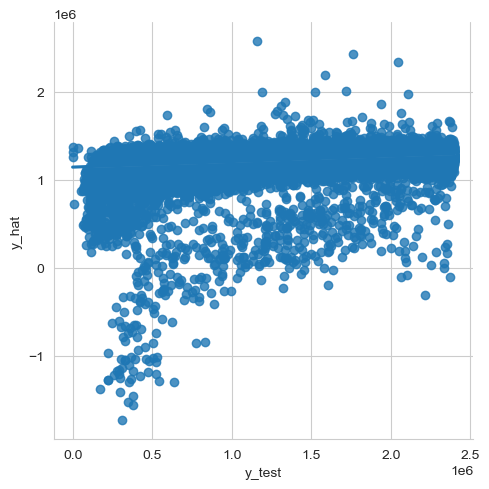

In [21]:
sns.set_style('whitegrid')
sns.lmplot(x ='y_test', y ='y_hat', data=output)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=0)
model.fit(x_train[0:200000], y_train[0:200000])

In [ ]:
y_hat = model.predict(x_test)

mean_absolute_error(y_test, y_hat)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()

# model.fit(x_train[0:200000], y_train[0:200000])

In [ ]:
# y_hat = model.predict(x_test)

# mean_absolute_error(y_test, y_hat)

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
